# Final Examination Machine Learning for cognitive sciences: Principles and Applications 2023-2024.Decoding maps from hippocampal activity


Jezek et al (1) trained a rodent in two environments (square boxes), equal in size and shape, but differing by their light conditions. A population of $L=34$ CA3 place cells was recorded during reference sessions with fixed light conditions, and shown to define environment-specific maps, denoted by A and B. In a subsequent test session, taking place in a single box, instantaneous switches between environmental light conditions are performed and 'teleport' the animal in the other box. This teleportation  trigger the instability of the recalled cognitive map, which flicker back and forth between the two corresponding environments after the ligth switch.

In this notebook, you will train a HMM model with the aim of decoding the transition between cognitive maps from the spiking activity of the place cells during the flickering transitions. You will then use the model to characterize and simulate the flickering dynamics and equilibrium probability of the activity.

## Bibliography
1. Posani, Lorenzo, Simona Cocco, and Rémi Monasson. "Integration and multiplexing of positional and contextual information by the hippocampal network." PLoS computational biology 14.8 (2018): e1006320. https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006320
2. Jezek, Karel, et al. "Theta-paced flickering between place-cell maps in the hippocampus." Nature 478.7368 (2011): 246-249. https://www.nature.com/articles/nature10439

## Data
The data consists of the following files:
1. `cellDataA.mat` contains the spike times of the $L=34$ place cells recorded in environment `A`.
2. `cellDataB.mat` contains the spike times of the $L=34$ place cells recorded in environment `B`.
3. `cellDataD.mat` contain the spike times of the $L=34$ place cells recorded during the teleporting session, when the animal was teleported from environment `A` to `B` and vice versa, several times, starting from environment `A`. The times of the teleportation events are given in `teleportTimes.mat`.

In all the data files, the **time unit** is 1 second.

In the Data Directory you will find also the parameters necessary to build the emission probabilities of the HMM model: biases_A, biases_B giving the probabilities that each neuron is active in the two hidden states  X= A and X=B corresponding to the 2 maps (see below).



# Initial notebook

Using the code given in the starting notebook below, you will load the data of spiking activities, discretize and binarize the spiking events, using discrete time bins of duration 120ms (corresponding to the $\theta$ rythm duration). For each experiment,  an activity  matrix is defined $\mathbf{S} = (S_{ti})$ with $T$ rows corresponding to each time bin, and $L$ columns corresponding to each place cell. $S_{ti}=1$ if the $i$-th place cell spiked at least once in the $t$-th time bin, and $S_{ti}=0$ otherwise. 

You will also load the probabilities that each neuron is active in the two hidden states 

## Questions 

(T) indicates theory question, which can be answered directly on the notebook or on the paper (and you will then scan or take a picture to put it on the moodle).
(C) indicates coding questions to be answered on the notebook.

**Q1 (T):** Describe an HMM model, what are the main dynamical assumptions, variables, and parameters? How it is possible to efficiently compute the probability of a particular sequence of emitted symbols in an HMM model, once the parameters of the model have been fixed? You may cite recent works in which an HMM has been used to analyse  recorded neural activity.  

You will build an HMM model to follow the internal map, decoded from the recorded activity, during the flickering transitions. The hidden variables are the decoded map $X={A,B}$.

The transition probabilities matrix (rows correspond to the possible states at time step t+1, columns to the ones at time step t. The  rates are probilities because the time is discrete):

$$\begin{aligned}
\Omega &= \begin{pmatrix}
\Omega (A\rightarrow A) & \Omega (B\rightarrow A)  \\
\Omega (A\rightarrow B) & \Omega (B\rightarrow B)  \\
\end{pmatrix} \\
&= \begin{pmatrix}
1 - r_{A} & r_{B}   \\
r_{A}  & 1-r_{B} \\
\end{pmatrix}
\end{aligned}$$

with $r_{A}=0.018$, $r_{B}=0.02$

The emission probabilities are described by an independent model for the spiking activity:

$${\cal E}(s_1,s_2,\ldots s_L|X)=  \prod_{i=1}^L P(s_i|X)$$
where $P(s_i|X)= \frac{e^{\;h_i^{X}\,s_i}}{1+e^{\;h_i^{X}}}$

**Q2 (T):** Describe the model used above for the emission probability. To what class of model it belongs? What are the constraints that the model should reproduce? How its field parameters are inferred from neural recordings?

**Q3 (C):** Plot the scatter of the vectors pa,pb given in the initial notebook (representing the probabilities of each neuron being active in a time bin, given the hidden state X=A or X=B) versus  the empirical probability of each neuron being active obtained from the data spiking matrices (SA,SB) from each of the two train sessions. The parameters pa,pb  have been inferred from the HMM model built in the teleportation experiment.  Comment the scatters: do you expect they are similar of not?

**Q4 (C):** Infer from the probability that the neuron is active in the two hidden states (vectors pa,pb in the initial notebook) the field parameters $h_i^X$  (X=A, X=B), to define the emission probability as described above.  Code a function outputting the emission probabilities for the 2 possible hidden states (X=A,X=B), from a spiking matrix in input (eg. SA, SB, SAB).

Print the logarithm of the emission probability for the second  configuration of activity of SA, SB, SAB and the corresponding most probable hidden state $(x_{in}^A,x_{in}^B,x_{in}^{AB})$.

Define the transition probability matrix $\Omega$ as described above.

**Q5 (C):** Program the Viterbi Algorithm, outputting the most probable sequence of hidden states and the probability of such hidden path, taking as input the spiking matrix $(S_A,S_B,S_{AB})$ and the initial configuration for the hidden variable $(x_{in}^A,x_{in}^B,x_{in}^{AB})$.

**Q6 (C):** Plot the transitions between decoded map during the two train sessions (from the spiking matrices SA SB), starting from $x_{in}^A,x_{in}^B$ in Q4. Give the probability of the most-probable path. Give the percentage of errors (as the number of time bins in which the decoded map is not the true one over the total number of time bin in the the recorded session) in decoding the environment for the two data sets.

**Q7 (C):** Plot the transitions between decoded map during the teleportation experiment (from the spiking matrix SAB),starting from $x_{in}^{\,AB}$ in Plot the teleportaion times on the same figure. 
Plot the transitions  between decoded maps after the first  teleportation, focusing the plot between time step 0 and 800. Comment the plot.

Give the probability of the most-probable path. Give the percentage of errors in decoding the environments for the flickering set, between the beginning and the last teleportation time. You have the true environments from the teleportation times corresponding to the change of the environments by the light switches (in teleportTimes). The animal is initially in A. Comment the percentage of errors in decoding the environments in AB with respect the ones obtained for the recording  sessions in A or in B.

**Q8 (C):** Plot the histogram of the averages number of consecutive steps spent in each hidden state (sejourn time) and compute its mean value during the train sessions (SA,SB) and the flickering one (SAB).
Discuss the difference in sejourn times from SA, SB,SAB. The mean sejurn times in  SAB is related to whath constant of the HMM model? 
Obtain the  probability to be in an hidden state  as the fraction of time spent in each hidden state. 

**Q9 (T):** Compute (analythically or numerically) the equilibrium probability for the hidden states in the flickering session, $P_{eq}(x')$, satisfying $P_{eq}(x') = \sum_x \Omega(x',x)P_{eq}(x)$. *Hint: $P_{eq}(x)$ is the right eigenvector of $\Omega$ (corresponding to what eigenvalue?)*. Write the equilibrium probability distribution of the neural activity during the flickering transition, using the properties of conditional probability. What property have you used?

**Q10 (C):** Plot the scatter of the equilibrium probabilities of each neuron being active in the model (using Q9) versus the ones obtained from the data in the flickering session (SAB).

In [1]:
import scipy
import scipy.io
import numpy as np
import numpy
import matplotlib.pyplot as plt

In [2]:
# Spiking times
datasA = scipy.io.loadmat('data_2/cellDataA.mat', matlab_compatible=True)['cellDataA'][0] # environment A
datasB = scipy.io.loadmat('data_2/cellDataB.mat', matlab_compatible=True)['cellDataB'][0] # environment B
datasD = scipy.io.loadmat('data_2/cellDataD.mat', matlab_compatible=True)['cellDataD'][0] # teleportation sessions

# Teleport times
teleportTimes = scipy.io.loadmat('data_2/teleportTimes.mat', matlab_compatible=True)['teleportTimes']

In [3]:
def binarize(datas, dt=0.12):
    L = len(datas)
    Tmax = numpy.max([numpy.max(d) for d in datas if d.size > 0])
    S = numpy.zeros((int(Tmax / dt + 1), L), dtype=int)
    for (i, d) in enumerate(datas):
        #assert d.shape == (len(d), 1)
        for t in d.flatten():
            S[int(t / dt), i] = 1
    return S

In [4]:
# Activity matrices for the 3 recordings
SA=binarize(datasA, dt=0.12)
SB=binarize(datasB, dt=0.12)
SAB=binarize(datasD, dt=0.12)

In [5]:
L=np.size(SA,1)
print(np.size(SA,0),L)

5145 34


Parameters to build the HMM model

In [6]:
# load probabilities that a neuron spikes condditioned on the two hidden states of the HMM
pa = np.loadtxt('data_2/biases.txt')[0,:]
pb = np.loadtxt('data_2/biases.txt')[1,:]

# Solutions

**Q1 (T):** Describe an HMM model, what are the main dynamical assumptions, variables, and parameters? How it is possible to efficiently compute the probability of a particular sequence of emitted symbols in an HMM model, once the parameters of the model have been fixed? You may cite recent works in which an HMM has been used to analyse  recorded neural activity.  

You will build an HMM model to follow the internal map, decoded from the recorded activity, during the flickering transitions. The hidden variables are the decoded map $X={A,B}$.

The transition probabilities matrix (rows correspond to the possible states at time step t+1, columns to the ones at time step t. The  rates are probilities because the time is discrete):

$$\begin{aligned}
\Omega &= \begin{pmatrix}
\Omega (A\rightarrow A) & \Omega (B\rightarrow A)  \\
\Omega (A\rightarrow B) & \Omega (B\rightarrow B)  \\
\end{pmatrix} \\
&= \begin{pmatrix}
1 - r_{A} & r_{B}   \\
r_{A}  & 1-r_{B} \\
\end{pmatrix}
\end{aligned}$$

with $r_{A}=0.018$, $r_{B}=0.02$

The emission probabilities are described by an independent model for the spiking activity:

$${\cal E}(s_1,s_2,\ldots s_L|X)=  \prod_{i=1}^L P(s_i|X)$$
where $P(s_i|X)= \frac{e^{\;h_i^{X}\,s_i}}{1+e^{\;h_i^{X}}}$

**Answer**

A Hidden Markov Model (HMM) is a mathematical framework used to represent a system that undergoes transitions between a set of hidden states. The key parameters defining an HMM are the initial probabilities of the states, the transition probabilities between hidden states, and the emission probabilities from these hidden states.

In an HMM, the variables consist of the possible hidden states the model can exhibit. The fundamental assumption in the dynamics of an HMM is that the probability of transitioning to a new state is solely dependent on the current state. This concept is derived from "Markov chains," which asserts that the likelihood of the future state, considering both the current and past states, is the same as the likelihood of the future state based only on the present state.

Additionally, the dynamical assumption of output independence posits that the current emitted state is influenced solely by the current hidden state and not by the preceding one. Finally, the stationarity assumption asserts that the transition probabilities remain constant over time.

HMM have a huge range of applications:

1. Speech recognition -> what is the most likely sentence trajectory
2. Decoding of neural replay sequences/brain states in MEG
3. Decoding of trajectories (fish example)
4. Mazzuccato et al. (2019) -> Sensory stimuli can be recognized more rapidly when they are expected. 

**Q2 (T):** Describe the model used above for the emission probability. To what class of model it belongs? What are the constraints that the model should reproduce? How its field parameters are inferred from neural recordings?


**Answer**

The model used for the emission probability stipulates that the emission probability of a sequence of spiking events is given by the product of the conditional probabilities of spiking given the hidden state. This kind of model belongs to the class of Maximum Entropy models. Field parameters can be inferred from the neural recordings as:

The probability of one neuron to spike $S_{i}$ in environemnt is given by $P(s_i)$:

<br>

\begin{equation*}
p(s_{i}) = \frac{e^{hi si}}{1+e^{hi}}
\end{equation*}

<br>

- Where the probability of a neuron being active is given by $P_{i}$ and that of being inactive is $1-P_{i}$
    
    \begin{equation*}
    p(s_{i} = 1) = p_{i}
    \end{equation*}
    
    \begin{equation*}
    p(s_{i} = o) = 1- p_{i}
    \end{equation*}
    
    As such, hi is given by:
    
    \begin{equation*}
    h_i = \log{\frac{p_i}{1-p_i}}
    \end{equation*}

<br>


**Q3 (C):** Plot the scatter of the vectors pa,pb given in the initial notebook (representing the probabilities of each neuron being active in a time bin, given the hidden state X=A or X=B) versus  the empirical probability of each neuron being active obtained from the data spiking matrices (SA,SB) from each of the two train sessions. The parameters pa,pb  have been inferred from the HMM model built in the teleportation experiment.  Comment the scatters: do you expect they are similar of not?

In [7]:
#Scatter plot of Pa (probability of neuron actuve given hidden state a) and Pb
#versus the empirical probability of each neuron being active obtained from data spiking matrices Sa, Sb

#Define the empirical probability for each neuron
def probability (S):
    prob=np.mean(S, axis=0) #axis=0 calculates the mean over each row so it results in one value per row, one value per neuron
    return prob


In [8]:
prob_datasA = probability(SA)
prob_datasB = probability(SB)
prob_datasAB = probability(SAB)

In [9]:
def scatter_plot (ax, prob_hid, prob_emp, title, x_label, y_label):
    ax.scatter(prob_hid, prob_emp)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

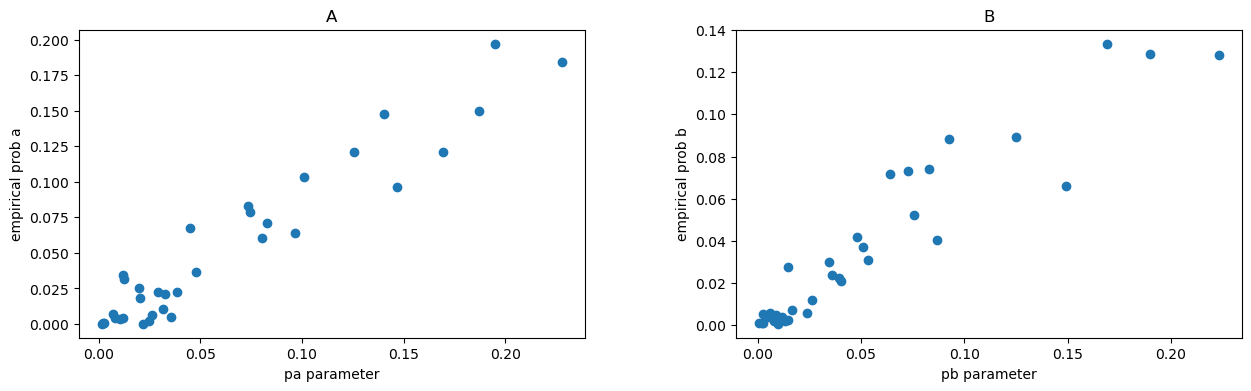

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))  # 1 row, 3 columns for subplots
plt.subplots_adjust(wspace=0.3) 

scatter_plot(ax1,pa,prob_datasA, "A", "pa parameter", "empirical prob a")
scatter_plot(ax2,pb,prob_datasB, "B", "pb parameter", "empirical prob b")

**Interpretation**

The first scatter plot illustrates a good correlation between the probability (pa) of a neuron being active in a specific time-bin, given the inferred hidden state (X=A) from the Hidden Markov Model (HMM), and the empirical probability of the neuron recorded in environment A. In a well-performing model, one would expect the model's probability values to closely match the empirical values, indicating accurate decoding.

On the other hand, in the second graph there appears to be only a partial correlation between the inferred hidden probability and the empirical one. Perhaps, the HMM had more difficulty in identifying hidden state B due to the noise during the flickering session.

Despite this, the expectation is for the two graphs to be quite similar as if the model does not think the hidden state is A, it will opt for B and vice-versa.



**Q4 (C):** Infer from the probability that the neuron is active in the two hidden states (vectors pa,pb in the initial notebook) the field parameters $h_i^X$  (X=A, X=B), to define the emission probability as described above.  Code a function outputting the emission probabilities for the 2 possible hidden states (X=A,X=B), from a spiking matrix in input (eg. SA, SB, SAB).

Print the logarithm of the emission probability for the second  configuration of activity of SA, SB, SAB and the corresponding most probable hidden state $(x_{in}^A,x_{in}^B,x_{in}^{AB})$.

Define the transition probability matrix $\Omega$ as described above.

In [11]:
#Infer parameter hi -> expresses how likely it is for the neuron to be active compared to not being active
#so if hi_a > hi_b for a given neuron it is more likely the animal is in a

def hi_parameter (hidden_prob_datas):
    hi = np.log(hidden_prob_datas / (1 - hidden_prob_datas))
    return hi

In [12]:
#Compute hi parameters for X=A and X=B
hi_a = hi_parameter (pa)
hi_b = hi_parameter (pb)

In [13]:
#Compute P(Si|X)

def probSi_givenX (hidden_prob_datas, emp_prob_datas):
    hi = np.log(hidden_prob_datas / (1 - hidden_prob_datas))
    si = emp_prob_datas
    prob_givenX = np.exp(hi*si)/(1+np.exp(hi))
    return prob_givenX


In [14]:
#Probability of neuron being active in A given hidden state A
P_SA_a = probSi_givenX(pa, SA)

#Probability of neuron being active in A given hidden state B
P_SA_b = probSi_givenX(pb, SA)

#Probability of neuron being active in B given hidden state A
P_SB_a = probSi_givenX(pa, SB)

#Probability of neuron being active in B given hidden state A
P_SB_b = probSi_givenX(pb, SB)

#Probability of neuron being active in AB given hidden state A
P_SAB_a = probSi_givenX(pa, SAB)

#Probability of neuron being active in AB given hidden state B
P_SAB_b = probSi_givenX(pb, SAB)




In [15]:
#define the emission probability -> captures the likelihood of observing a particular emission when the system is in a specific state

def emission_prob (probSi_givenX):
    return np.prod(probSi_givenX, axis=1) #get one emission probability per time bin as you sum over columns (neurons)

In [16]:
#Emission probability of SA given hidden state A
emission_P_SA_a=emission_prob(P_SA_a)
print(emission_P_SA_a)

#Emission probability of SA given hidden state B
emission_P_SA_b=emission_prob(P_SA_b)
print(emission_P_SA_b)

#Emission probability of SB given hidden state A
emission_P_SB_a=emission_prob(P_SB_a)
print(emission_P_SB_a)

#Emission probability of SB given hidden state B
emission_P_SB_b=emission_prob(P_SB_b)
print(emission_P_SB_b)


#Emission probability of SAB given hidden state A
emission_P_SAB_a=emission_prob(P_SAB_a)
print(emission_P_SAB_a)

#Emission probability of SAB given hidden state B
emission_P_SAB_b=emission_prob(P_SAB_b)
print(emission_P_SAB_b)


[1.17753113e-03 3.11600244e-06 4.18712026e-05 ... 1.62226971e-05
 2.97857569e-02 1.32740863e-03]
[1.75714433e-07 2.28905377e-09 1.24708182e-08 ... 1.02080334e-08
 3.94893484e-03 9.79931050e-06]
[0.10107909 0.00331964 0.10107909 ... 0.10107909 0.10107909 0.00012173]
[1.46784441e-01 1.32794089e-02 1.46784441e-01 ... 1.46784441e-01
 1.46784441e-01 3.72504895e-07]
[3.98234021e-07 2.20108560e-03 2.67988688e-03 ... 2.98586891e-04
 9.53903811e-09 8.61446492e-06]
[6.43547695e-07 4.12376925e-05 1.08903129e-05 ... 8.06916393e-04
 4.19016012e-05 6.23191131e-04]


In [17]:
#define the log-emission probability

def log_emission_prob (emission_prob):
    log_emission_prob=np.log(emission_prob)
    return log_emission_prob

In [18]:
#Log emission probability of SA given hidden state A
log_emission_P_SA_a=log_emission_prob(emission_P_SA_a)
print(log_emission_P_SA_a[1])

#Log emission probability of SA given hidden state B
log_emission_P_SA_b=log_emission_prob(emission_P_SA_b)
print(log_emission_P_SA_b[1])

#Log emission probability of SB given hidden state A
log_emission_P_SB_a=log_emission_prob(emission_P_SB_a)
print(log_emission_P_SB_a[1])

#Log emission probability of SB given hidden state B
log_emission_P_SB_b=log_emission_prob(emission_P_SB_b)
print(log_emission_P_SB_b[1])

#Log emission probability of SAB given hidden state A
log_emission_P_SAB_a=log_emission_prob(emission_P_SAB_a)
print(log_emission_P_SAB_a[1])

#Log emission probability of SAB given hidden state B
log_emission_P_SAB_b=log_emission_prob(emission_P_SAB_b)
print(log_emission_P_SAB_b[1])


-12.678959645731814
-19.89512730737985
-5.707900307689672
-4.321540643557677
-6.118804585763629
-10.096157852509826


**Interpretation**

- The most probable state for SA is A as (log_emission_P_SA_a > log_emission_P_SA_b)
- The most probable state for SB is B as (log_emission_P_SB_b > log_emission_P_SB_a)
- The most probable state for SAB is A as (log_emission_P_SAB_a > log_emission_P_SAB_b)


In [19]:
#Define the transition probability matrix

ra = 0.018
rb = 0.02

omega = np.array([
    [1 - ra, rb],
    [ra, 1-rb],
  ])

omega

array([[0.982, 0.02 ],
       [0.018, 0.98 ]])

In [48]:
omega[0,1]

0.02

**Q5 (C):** Program the Viterbi Algorithm, outputting the most probable sequence of hidden states and the probability of such hidden path, taking as input the spiking matrix $(S_A,S_B,S_{AB})$ and the initial configuration for the hidden variable $(x_{in}^A,x_{in}^B,x_{in}^{AB})$.

In [20]:
#Define the viterbi algorithm

def viterbi (data, xin, em_a, em_b, omega):
    time_bins = data.shape[0] #Time bins from empirical data spikes
    E=np.zeros((2,time_bins)) #2 because we only have a 2 states in the transition matrix 

    E[0,:] = em_a #emission a
    E[1,:] = em_b #emission b

    vp = np.zeros(2)#initialise viterbi probabilities for each state
    #set the initial viterbi probabilities based on the 
    #initial transition matrix omega

    vp[0] = np.log(omega[xin,0]) 
    vp[1] = np.log(omega[xin,1])

    #temporary array to store updated Viterbi probabilities
    vptmp=np.zeros(2) 


    #initialise a matrix to stor the backpointer 
    #indices for each position and state
    xp=np.zeros((time_bins,2)).astype(int)


    #Viterbi recursion
    for i in range (time_bins-1):
        for x in range(2):
            #compute the log-probabilities for each state at the current position
            #based on previous viterbi prob., emission prob., state transition probs.
            lp=vp+E[:,i]+np.log(omega[x,:])
            #update the temporary array with the maximum log-probability 
            #for each state at the current position
            vptmp[x]=np.amax(lp)
            #store index of state that maximises the log-probability
            xp[i,x]=np.argmax(lp)
        vp=np.copy(vptmp)

    #Final log-probability and backtracking
    #compute the overall log-probability of the sequence at the last position
    lp=vp+E[:,time_bins-1]
    
    #find the max log-probability at the last position
    vplast=np.amax(lp)

    #initialise an array to store the most probable sequence of hidden states
    xf=np.zeros(time_bins).astype(int)

    #most probable hidden variable for the last base
    #store the index of the state that maximises the log-probability at the last position
    xf[time_bins-1]=np.argmax(lp)

    #Backpropagation to find the most probable sequence of hidden states
    #loop iterating backward from the second-to-last position to the first position 
    #updating array 'xf' containing the most probable sequence of hidden states
    for i in range(time_bins-2,-1,-1):
        xf[i]=xp[i,xf[i+1]]


    return xf, vplast

**Q6 (C):** Plot the transitions between decoded map during the two train sessions (from the spiking matrices SA SB), starting from $x_{in}^A,x_{in}^B$ in Q4. Give the probability of the most-probable path. Give the percentage of errors (as the number of time bins in which the decoded map is not the true one over the total number of time bin in the the recorded session) in decoding the environment for the two data sets.

-31773.608629104034


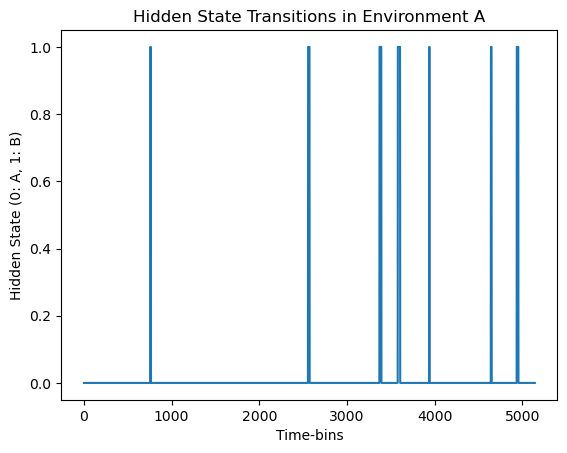

In [53]:

A, vplast = viterbi(SA, 0, log_emission_P_SA_a, log_emission_P_SA_b, omega )
print(vplast)


#hidden states transitions in SA 
plt.plot(A)
plt.xlabel("Time-bins")
plt.ylabel("Hidden State (0: A, 1: B)")
plt.title("Hidden State Transitions in Environment A")
plt.show()


-34351.50512751643


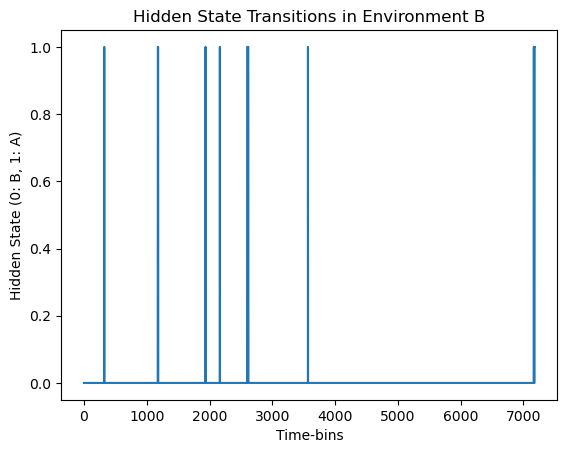

In [22]:

B, vplast = viterbi(SB, 0, log_emission_P_SB_b, log_emission_P_SB_a, omega )
print(vplast)

#hidden states transitions in SB 
plt.plot(B)
plt.xlabel("Time-bins")
plt.ylabel("Hidden State (0: B, 1: A)")
plt.title("Hidden State Transitions in Environment B")
plt.show()

In [23]:
#Percentage of error

err_A = A.mean(axis=0)*100 #the error is given by the mean over all time bins as every time there is a 1 it is an error
print(err_A)

err_B = B.mean(axis=0)*100
print(err_B)

2.099125364431487
0.5847139078379507


**Interpretation**

- The log-probability of the most probable path for environement A is -31773.61, whereas the log-probability for  the most probable path for environement B is -34351.51.


- The percentage of error of the HMM model in decoding the correct hidden state is 2.10% for environment A, while for environment B it is 0.58%.

**Q7 (C):** Plot the transitions between decoded map during the teleportation experiment (from the spiking matrix SAB),starting from $x_{in}^{\,AB}$ in Plot the teleportaion times on the same figure. 
Plot the transitions  between decoded maps after the first  teleportation, focusing the plot between time step 0 and 800. Comment the plot.



-43304.883209339205


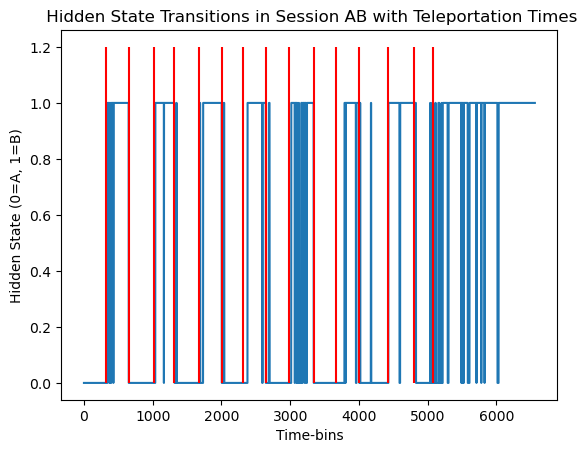

In [24]:
#plot of transitions between flickering session AB and teleportation times

AB, vplast = viterbi(SAB, 0, log_emission_P_SAB_a, log_emission_P_SAB_b, omega )
print(vplast)
plt.plot(AB)
plt.vlines(teleportTimes/0.12, ymin=0, ymax=1.2, color='r') #/0.12 because of 120ms time bins

# Figure Legend
plt.xlabel("Time-bins")
plt.ylabel("Hidden State (0=A, 1=B)")
plt.title(" Hidden State Transitions in Session AB with Teleportation Times")
plt.show()


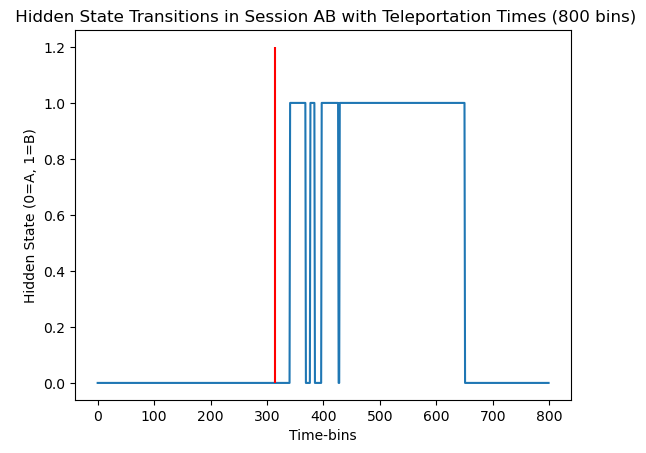

In [25]:
AB, vplast = viterbi(SAB, 0, log_emission_P_SAB_a, log_emission_P_SAB_b, omega )

#plot of transitions between flickering session AB and teleportation times for first 800 bins

plt.plot(AB[0:800])
plt.vlines(teleportTimes[0]/0.12, ymin=0, ymax=1.2, color='r')

# Figure Legend
plt.xlabel("Time-bins")
plt.ylabel("Hidden State (0=A, 1=B)")
plt.title(" Hidden State Transitions in Session AB with Teleportation Times (800 bins)")
plt.show()

**Interpretation**

The graph shows that after the teleportation event from environment A to B, the model displays flickering behavior between the two hidden states (a and b) for approximately 100 time bins. Subsequently, the model stabilises with a persistent representation of hidden state b.

Give the probability of the most-probable path. Give the percentage of errors in decoding the environments for the flickering set, between the beginning and the last teleportation time. You have the true environments from the teleportation times corresponding to the change of the environments by the light switches (in teleportTimes). The animal is initially in A. Comment the percentage of errors in decoding the environments in AB with respect the ones obtained for the recording  sessions in A or in B.

In [26]:
#Probability of the most probable path

AB, vplast = viterbi(SAB,0, log_emission_P_SAB_a, log_emission_P_SAB_b, omega)

vplast



-43304.883209339205

In [27]:
#Create boolean array depending on teleportTimes

dt=0.12
t_D = np.arange(0,SAB.shape[0]*dt, dt)

#Create a list of transition types ("A to B" or "B to A") based on the indices of teleportTimes
transition_type = ["A to B" if i % 2 == 0 else "B to A" for i in range(len(teleportTimes))]

bol_A = np.zeros(len(t_D))
bol_B = np.zeros(len(t_D))

# loop over pairs of teleportation times, and for each pair, check the corresponding transition type.
for idx, (start, end, tp_type) in enumerate(zip(teleportTimes, teleportTimes[1:], transition_type)):
    if tp_type == "B to A":
        bol_A[(t_D > start) & (t_D < end)] = 1 #If the transition type is "B to A," set the values of bol_A to 1 
    elif tp_type == "A to B":
        bol_B[(t_D > start) & (t_D < end)] = 1 #If the transition type is "A to B," set the values of bol_B to 1 

#last: set values of either bol_A or bol_B to 1 for time points beyond the last teleportation time, based on the last observed transition type
if transition_type[-1] == "B to A":
    bol_A[t_D > teleportTimes[-1]] = 1
elif transition_type[-1]=="A to B":
    bol_B[t_D > teleportTimes[-1]] = 1

In [28]:
#Define error function by comparing bolean to real datas
#Is the model showing the right environment?

def errors(time, data) : 
    errors = np.zeros(len(time))
    for i, t in enumerate(time) : 
        if bol_A[i] and data[i] == 1 : 
            errors[i] = 1
        elif bol_B[i] and data[i] == 0 : 
            errors[i] = 1
    return errors

In [29]:
errors_arr = errors(t_D, AB)

np.mean(errors_arr)

#error is 10%

0.10733343497484372

**Interpretation**

- The log-probability of the most probable path is -43304.88.
- The decoding error rate for the flickering session is 10.73%. When contrasted with the recording sessions in environments A and B, it is evident that the error rate during the flickering session is higher. This is expected, as the transition between environments in the flickering session introduces additional complexity, leading to a less stable decoding performance compared to situations where the animal remains within a single environment.

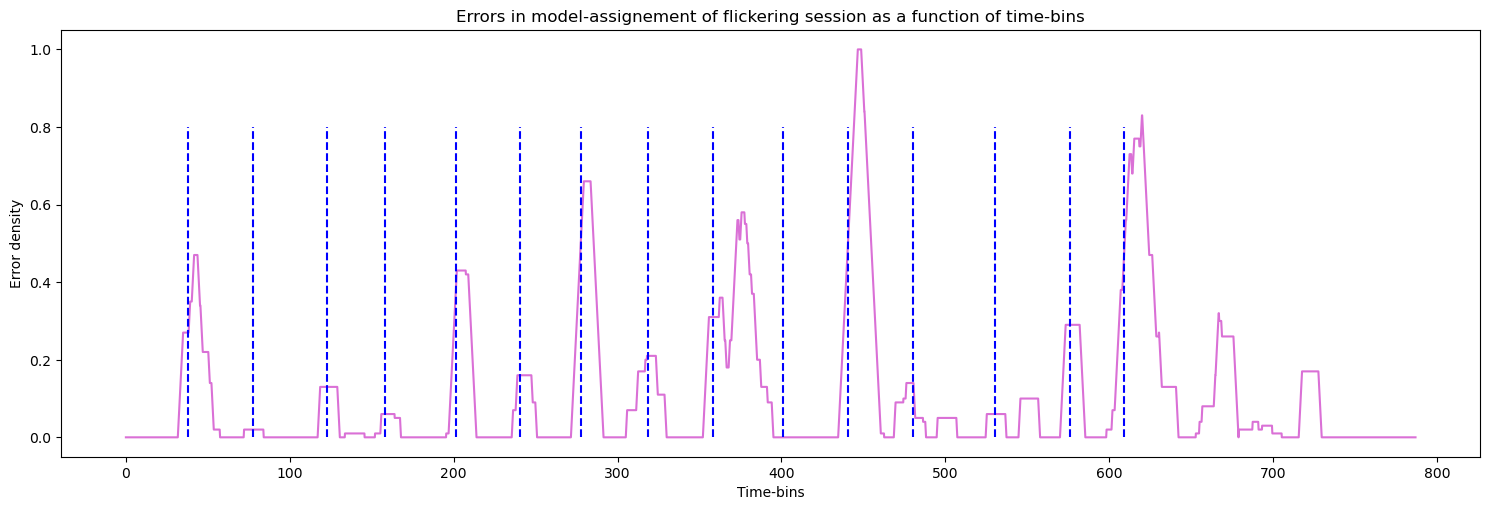

In [30]:
# Graphical representation of errors near teleport times

window_size = 100
errors_arr_smoothed = np.convolve(errors_arr, np.ones(window_size) / window_size, mode='same')

t_D_2 = t_D 
plt.figure(figsize=(15, 5))
plt.plot(t_D_2, errors_arr_smoothed, color='orchid')
plt.vlines(teleportTimes, 0, 0.8, color='blue', linestyle='--')
plt.xlabel('Time-bins')
plt.ylabel('Error density')
plt.tight_layout()
plt.title("Errors in model-assignement of flickering session as a function of time-bins")
plt.show()

**Q8 (C):** Plot the histogram of the averages number of consecutive steps spent in each hidden state (sejourn time) and compute its mean value during the train sessions (SA,SB) and the flickering one (SAB).
Discuss the difference in sejourn times from SA, SB,SAB. The mean sejurn times in  SAB is related to whath constant of the HMM model? 
Obtain the  probability to be in an hidden state  as the fraction of time spent in each hidden state. 

In [31]:
#Distribution of persistence time
def pers_times(xf):
    M=np.size(xf) #numbers of time bins
    times=np.zeros((2,M))

    # Initialize arrays to store persistence times for states 0 and 1
    times_0=[]
    times_1=[]
    
    #initialise counter variable
    k=0

    #iterate through the time bins
    #Count the number of consecutive identical values starting from the current time bin

    while (k<M): 
        x=xf[k]
        ki=0
   
        while (not (k+ki == M) and xf[k+ki]==x):
            ki+=1
       
        if(x==0):
            times_0.append(ki)
        elif(x==1):
            times_1.append(ki)
        
        k+=ki   
    
    return(np.mean(times_0),np.mean(times_1),np.sum(times_0)/M,np.sum(times_1)/M)

In [32]:
#should stop at the last teleportation time

print(pers_times(A)) #more in a when a

print(pers_times(B)) #for B times_0 is the time spent in B so it is right, in B you spend more time in hidden_b

print(pers_times(AB))

#on average you stay 74 time bins in hidden model a and 74 in hidden model b as the teleport times are constant

(629.625, 15.428571428571429, 0.9790087463556851, 0.02099125364431487)
(892.625, 5.25, 0.9941528609216205, 0.005847139078379507)
(74.0909090909091, 74.97727272727273, 0.4970269858210093, 0.5029730141789907)


In [33]:
labels = ['Hidden State A', 'Hidden State B']


def bar_plot(data, color1, color2, env, labels):
    # Extracting only the first two values from the tuple
    bars = pers_times(data)[0:2]  

    # Plotting the bar chart with specified colors
    plt.bar(labels, bars, color=[color1, color2])

    # Adding labels and title
    plt.xlabel('Hidden States')
    plt.ylabel('Mean Persistence Time')
    plt.title(f'Mean Persistence Time for Hidden States for Environment {env}')

    # Showing the plot
    plt.show()

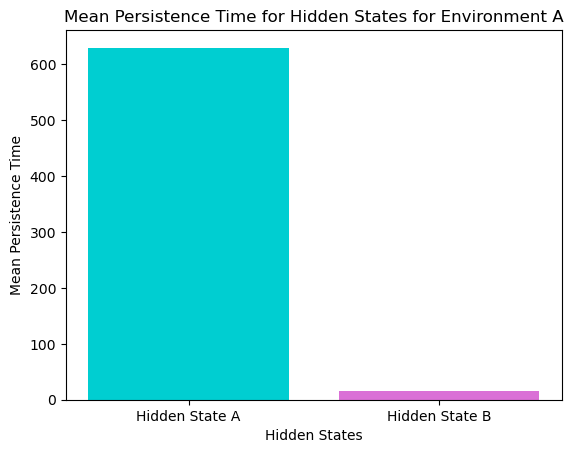

In [34]:
bar_plot(A,'darkturquoise', 'orchid', 'A', labels)

In [35]:
def bar_plot_b(data, color1, color2, env, labels):
    # Extracting only the first two values from the tuple
    bars = list(pers_times(data)[0:2])
    bars [0], bars [1] = bars [1], bars[0] 

    # Plotting the bar chart with specified colors
    plt.bar(labels, bars, color=[color1, color2])

    # Adding labels and title
    plt.xlabel('Hidden States')
    plt.ylabel('Mean Persistence Time')
    plt.title(f'Mean Persistence Time for Hidden States for Environment {env}')

    # Showing the plot
    plt.show()

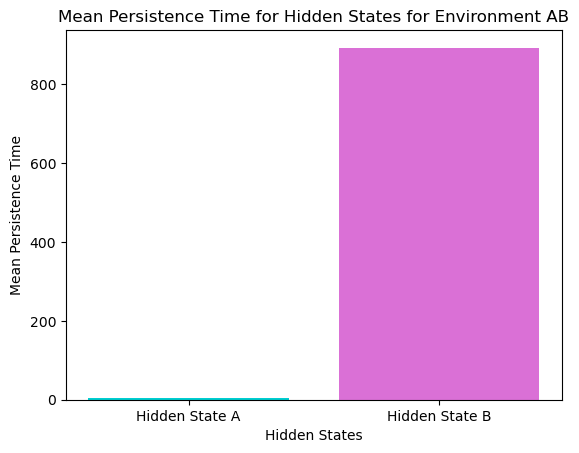

In [36]:
bar_plot_b(B,'darkturquoise', 'orchid', 'AB', labels)

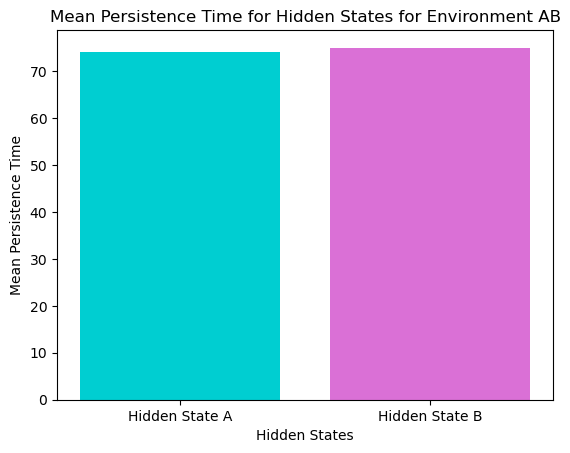

In [37]:
bar_plot(AB,'darkturquoise', 'orchid', 'AB', labels)


**Interpretation**

- In environment A, the hidden state "a" exhibits a longer average sejourn time, while in environment B, hidden state "B" has the greatest average sejourn time. This aligns with expectations, as within a single environment, the model should consistently infer the corresponding hidden state. In the mixed environment (AB), the average sejourn times for both hidden states are similar. This is reasonable since the model continuously switches between the two states, and each teleportation event has a comparable duration, resulting in similar mean persistence times.

- The mean sejourn times are directly linked to the transition probability constants of the Hidden Markov Model (HMM).

- The probability of being in hidden state "A" in environment "A" was 97.9%, while the probability of being in hidden state "B" for environment "A" was 2.09%.

- In environment "B," the probability of being in hidden state "B" was 99.4%, while the probability of being in hidden state "A" was 7.8%.

- In the mixed environment "AB," the probability of being in hidden state "A" was 49.7%, while the probability of being in hidden state "B" was 5.02%.


**Q9 (T):** Compute (analythically or numerically) the equilibrium probability for the hidden states in the flickering session, $P_{eq}(x')$, satisfying $P_{eq}(x') = \sum_x \Omega(x',x)P_{eq}(x)$. *Hint: $P_{eq}(x)$ is the right eigenvector of $\Omega$ (corresponding to what eigenvalue?)*. Write the equilibrium probability distribution of the neural activity during the flickering transition, using the properties of conditional probability. What property have you used?

In [38]:
ra = 0.018
rb = 0.02

omega = np.array([
    [1 - ra, rb],
    [ra, 1-rb],
  ])

omega

#Calculate eigenvalues and eigenvectors of omega
eigenvalues, eigenvectors = np.linalg.eig(omega)

#find the index of the eigenvalue in the array eigenvalues that is closest to the value 1
index_of_1 = np.argmin(np.abs(eigenvalues-1))

#obtain equilibrium_eigenvector
equilibrium_eigenvector = eigenvectors[:, index_of_1]

#obtain equilibrium_probabilities
equilibrium_probabilities = equilibrium_eigenvector/np.sum(equilibrium_eigenvector)  #scaling the probabilities so that they add up to 1

print(eigenvalues)
print(equilibrium_eigenvector)
print(equilibrium_probabilities)



[1.    0.962]
[0.74329415 0.66896473]
[0.52631579 0.47368421]


**Interpretation**

- As calculated numerically above, the equilibrium probabilities $P(A)_{eq}$ and $P(B)_{eq}$ are given by 52.6% and 47.4% respectively.

- A hand-written calculation is also enclosed on Moodle.


- Using the law of margianl probability, the equilibrium probability distribution is given by: 

    - $ P(SAB)_{eq} = P(A)_{eq} \cdot P(SAB|A) + P(B)_{eq} \cdot P(SAB|B) $


**Q10 (C):** Plot the scatter of the equilibrium probabilities of each neuron being active in the model (using Q9) versus the ones obtained from the data in the flickering session (SAB).


In [39]:
#Define equilibrium probability

def eq_prob (pa_eq, pa, pb_eq, pb): 
    P_SAB_eq = pa_eq*pa + pb_eq*pb
    return P_SAB_eq

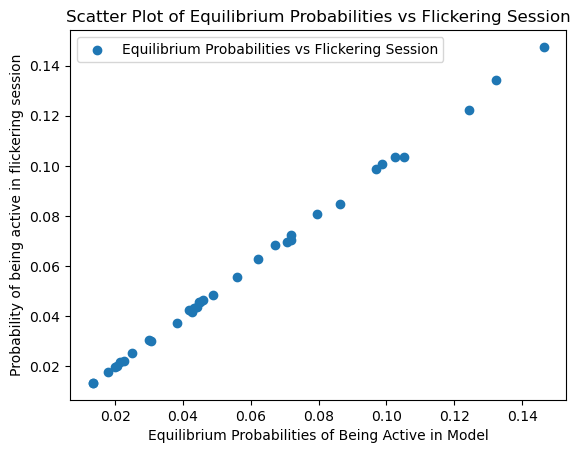

In [40]:
pa_eq = equilibrium_probabilities[0]
pb_eq = equilibrium_probabilities[1]

P_SAB_eq = eq_prob(pa_eq, pa, pb_eq, pb) #pa is actually P(SAB|A) as it is the model saying a in environment AB

emp_prob=np.mean(SAB, axis=0)

#scatter of the equilibrium probabilities being active in model vs flickering session
plt.scatter(P_SAB_eq, emp_prob)

# Figure Legend
plt.legend(["Equilibrium Probabilities vs Flickering Session"])
plt.xlabel("Equilibrium Probabilities of Being Active in Model")
plt.ylabel("Probability of being active in flickering session")
plt.title("Scatter Plot of Equilibrium Probabilities vs Flickering Session")
plt.show()